In [1]:
import warnings 
warnings.filterwarnings('ignore')
from silence_tensorflow import silence_tensorflow
import os
import random as rn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import kaggle
import zipfile

In [2]:
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0




  0%|          | 0.00/385M [00:00<?, ?B/s]
  0%|          | 1.00M/385M [00:01<07:00, 958kB/s]
  1%|          | 2.00M/385M [00:01<03:32, 1.89MB/s]
  1%|          | 3.00M/385M [00:01<02:24, 2.77MB/s]
  1%|          | 4.00M/385M [00:01<01:58, 3.39MB/s]
  1%|▏         | 5.00M/385M [00:01<01:48, 3.66MB/s]
  2%|▏         | 6.00M/385M [00:02<01:31, 4.35MB/s]
  2%|▏         | 7.00M/385M [00:02<01:21, 4.84MB/s]
  2%|▏         | 8.00M/385M [00:02<01:13, 5.37MB/s]
  2%|▏         | 9.00M/385M [00:02<01:04, 6.10MB/s]
  3%|▎         | 11.0M/385M [00:02<00:56, 6.96MB/s]
  3%|▎         | 12.0M/385M [00:02<00:52, 7.42MB/s]
  4%|▎         | 14.0M/385M [00:03<00:48, 8.03MB/s]
  4%|▍         | 16.0M/385M [00:03<00:47, 8.23MB/s]
  4%|▍         | 17.0M/385M [00:03<00:47, 8.13MB/s]
  5%|▍         | 19.0M/385M [00:03<00:46, 8.19MB/s]
  5%|▌         | 20.0M/385M [00:03<00:45, 8.46MB/s]
  5%|▌         | 21.0M/385M [00:03<00:44, 8.57MB/s]
  6%|▌         | 22.0M/385M [00:04<00:44, 8.55MB/s]
  6%|▌         | 23.0

In [ ]:
if len(tf.config.list_physical_devices('GPU')) == 0 :
    print(f"CPU is in used")
else :
    print(f"GPU is in used")

In [3]:
zip_file = 'cards-image-datasetclassification.zip'
destination_folder = 'unzipped_data' 

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print('Dataset unzipped successfully!')

Dataset unzipped successfully!


In [4]:
root_dir = 'unzipped_data/train' # root directory
f_names = [f_name for f_name in os.listdir(root_dir)] # names of folders (or files)
print(f"Folder (or file) names:\n{f_names}")

Folder (or file) names:
['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


In [5]:
card_classes = f_names.copy()
print(f"card classes:\n{', '.join(card_classes)}")

card classes:
ace of clubs, ace of diamonds, ace of hearts, ace of spades, eight of clubs, eight of diamonds, eight of hearts, eight of spades, five of clubs, five of diamonds, five of hearts, five of spades, four of clubs, four of diamonds, four of hearts, four of spades, jack of clubs, jack of diamonds, jack of hearts, jack of spades, joker, king of clubs, king of diamonds, king of hearts, king of spades, nine of clubs, nine of diamonds, nine of hearts, nine of spades, queen of clubs, queen of diamonds, queen of hearts, queen of spades, seven of clubs, seven of diamonds, seven of hearts, seven of spades, six of clubs, six of diamonds, six of hearts, six of spades, ten of clubs, ten of diamonds, ten of hearts, ten of spades, three of clubs, three of diamonds, three of hearts, three of spades, two of clubs, two of diamonds, two of hearts, two of spades


In [9]:
from PIL import Image

def samples_card_images(card_class):
    card_dir = os.listdir(os.path.join(root_dir, card_class))
    random_selection = rn.choices(card_dir, k=5)

    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, img_name in enumerate(random_selection):
        img_path = os.path.join(root_dir, card_class, img_name)
        img = Image.open(img_path)  
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.show()

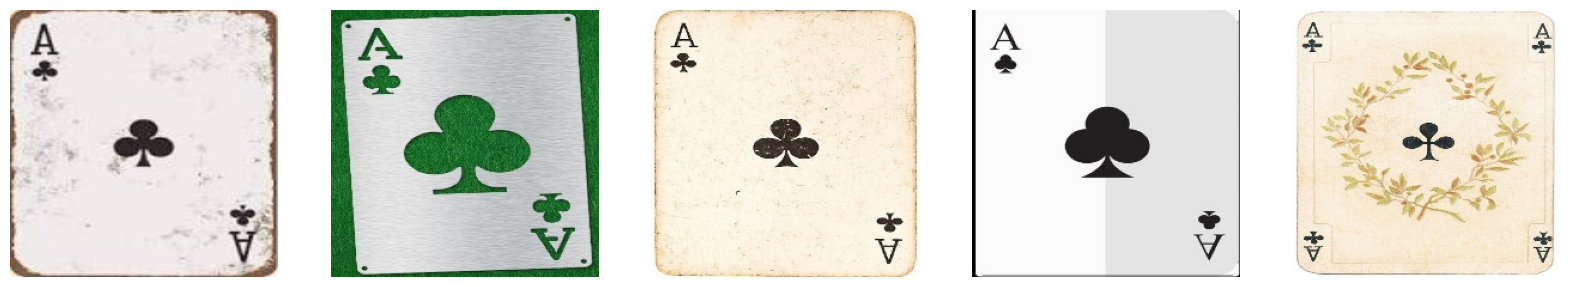

In [10]:
samples_card_images('ace of clubs')

In [11]:
classes_counts = {card_class: len(os.listdir(os.path.join(root_dir, card_class))) for card_class in card_classes}
classes_counts

{'ace of clubs': 120,
 'ace of diamonds': 129,
 'ace of hearts': 171,
 'ace of spades': 181,
 'eight of clubs': 138,
 'eight of diamonds': 159,
 'eight of hearts': 152,
 'eight of spades': 135,
 'five of clubs': 150,
 'five of diamonds': 138,
 'five of hearts': 136,
 'five of spades': 158,
 'four of clubs': 157,
 'four of diamonds': 114,
 'four of hearts': 154,
 'four of spades': 140,
 'jack of clubs': 171,
 'jack of diamonds': 160,
 'jack of hearts': 168,
 'jack of spades': 172,
 'joker': 115,
 'king of clubs': 128,
 'king of diamonds': 135,
 'king of hearts': 125,
 'king of spades': 151,
 'nine of clubs': 124,
 'nine of diamonds': 129,
 'nine of hearts': 133,
 'nine of spades': 154,
 'queen of clubs': 161,
 'queen of diamonds': 163,
 'queen of hearts': 139,
 'queen of spades': 162,
 'seven of clubs': 108,
 'seven of diamonds': 124,
 'seven of hearts': 143,
 'seven of spades': 165,
 'six of clubs': 152,
 'six of diamonds': 139,
 'six of hearts': 127,
 'six of spades': 158,
 'ten of cl

In [12]:
card_list = []

for card_class in card_classes:
    class_dir = os.path.join(root_dir, card_class)
    for img_path in os.listdir(class_dir):
        full_path = os.path.join(class_dir, img_path)
        card_list.append((full_path, card_class))

Train

In [14]:
df = pd.DataFrame(card_list, columns=["File_Path", "Label"])
df.head(10)

,File_Path,Label
0,unzipped_data/train\ace of clubs\001.jpg,ace of clubs
1,unzipped_data/train\ace of clubs\002.jpg,ace of clubs
2,unzipped_data/train\ace of clubs\003.jpg,ace of clubs
3,unzipped_data/train\ace of clubs\004.jpg,ace of clubs
4,unzipped_data/train\ace of clubs\005.jpg,ace of clubs
5,unzipped_data/train\ace of clubs\006.jpg,ace of clubs
6,unzipped_data/train\ace of clubs\007.jpg,ace of clubs
7,unzipped_data/train\ace of clubs\008.jpg,ace of clubs
8,unzipped_data/train\ace of clubs\009.jpg,ace of clubs
9,unzipped_data/train\ace of clubs\010.jpg,ace of clubs


In [16]:
train_set = df.sample(frac=1).reset_index(drop=True)
train_set.head(10)

,File_Path,Label
0,unzipped_data/train\three of spades\129.jpg,three of spades
1,unzipped_data/train\queen of diamonds\141.jpg,queen of diamonds
2,unzipped_data/train\two of spades\110.jpg,two of spades
3,unzipped_data/train\king of hearts\047.jpg,king of hearts
4,unzipped_data/train\ten of diamonds\114.jpg,ten of diamonds
5,unzipped_data/train\three of hearts\070.jpg,three of hearts
6,unzipped_data/train\eight of hearts\137.jpg,eight of hearts
7,unzipped_data/train\eight of diamonds\106.jpg,eight of diamonds
8,unzipped_data/train\six of clubs\040.jpg,six of clubs
9,unzipped_data/train\six of hearts\041.jpg,six of hearts


Test

In [17]:
root_dir = 'unzipped_data/test' # root directory
f_names = [f_name for f_name in os.listdir(root_dir)] # names of folders (or files)
print(f"Folder (or file) names:\n{f_names}")

Folder (or file) names:
['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


In [18]:
card_list = []

for card_class in card_classes:
    class_dir = os.path.join(root_dir, card_class)
    for img_path in os.listdir(class_dir):
        full_path = os.path.join(class_dir, img_path)
        card_list.append((full_path, card_class))

In [19]:
df = pd.DataFrame(card_list, columns=["File_Path", "Label"])
df.head(10)

,File_Path,Label
0,unzipped_data/test\ace of clubs\1.jpg,ace of clubs
1,unzipped_data/test\ace of clubs\2.jpg,ace of clubs
2,unzipped_data/test\ace of clubs\3.jpg,ace of clubs
3,unzipped_data/test\ace of clubs\4.jpg,ace of clubs
4,unzipped_data/test\ace of clubs\5.jpg,ace of clubs
5,unzipped_data/test\ace of diamonds\1.jpg,ace of diamonds
6,unzipped_data/test\ace of diamonds\2.jpg,ace of diamonds
7,unzipped_data/test\ace of diamonds\3.jpg,ace of diamonds
8,unzipped_data/test\ace of diamonds\4.jpg,ace of diamonds
9,unzipped_data/test\ace of diamonds\5.jpg,ace of diamonds


In [20]:
test_set = df.sample(frac=1).reset_index(drop=True)
test_set.head(10)

,File_Path,Label
0,unzipped_data/test\seven of hearts\1.jpg,seven of hearts
1,unzipped_data/test\king of hearts\2.jpg,king of hearts
2,unzipped_data/test\queen of diamonds\5.jpg,queen of diamonds
3,unzipped_data/test\king of diamonds\1.jpg,king of diamonds
4,unzipped_data/test\seven of spades\1.jpg,seven of spades
5,unzipped_data/test\ace of spades\5.jpg,ace of spades
6,unzipped_data/test\six of diamonds\5.jpg,six of diamonds
7,unzipped_data/test\nine of spades\5.jpg,nine of spades
8,unzipped_data/test\eight of diamonds\3.jpg,eight of diamonds
9,unzipped_data/test\five of spades\2.jpg,five of spades


Valid

In [22]:
root_dir = 'unzipped_data/valid' # root directory
f_names = [f_name for f_name in os.listdir(root_dir)] # names of folders (or files)
print(f"Folder (or file) names:\n{f_names}")

Folder (or file) names:
['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


In [23]:
card_list = []

for card_class in card_classes:
    class_dir = os.path.join(root_dir, card_class)
    for img_path in os.listdir(class_dir):
        full_path = os.path.join(class_dir, img_path)
        card_list.append((full_path, card_class))

In [24]:
df = pd.DataFrame(card_list, columns=["File_Path", "Label"])
df.head(10)

,File_Path,Label
0,unzipped_data/valid\ace of clubs\1.jpg,ace of clubs
1,unzipped_data/valid\ace of clubs\2.jpg,ace of clubs
2,unzipped_data/valid\ace of clubs\3.jpg,ace of clubs
3,unzipped_data/valid\ace of clubs\4.jpg,ace of clubs
4,unzipped_data/valid\ace of clubs\5.jpg,ace of clubs
5,unzipped_data/valid\ace of diamonds\1.jpg,ace of diamonds
6,unzipped_data/valid\ace of diamonds\2.jpg,ace of diamonds
7,unzipped_data/valid\ace of diamonds\3.jpg,ace of diamonds
8,unzipped_data/valid\ace of diamonds\4.jpg,ace of diamonds
9,unzipped_data/valid\ace of diamonds\5.jpg,ace of diamonds


In [25]:
valid_set = df.sample(frac=1).reset_index(drop=True)
valid_set.head(10)

,File_Path,Label
0,unzipped_data/valid\jack of clubs\4.jpg,jack of clubs
1,unzipped_data/valid\four of diamonds\4.jpg,four of diamonds
2,unzipped_data/valid\four of diamonds\1.jpg,four of diamonds
3,unzipped_data/valid\three of diamonds\3.jpg,three of diamonds
4,unzipped_data/valid\ace of clubs\1.jpg,ace of clubs
5,unzipped_data/valid\ace of clubs\3.jpg,ace of clubs
6,unzipped_data/valid\seven of diamonds\5.jpg,seven of diamonds
7,unzipped_data/valid\king of clubs\4.jpg,king of clubs
8,unzipped_data/valid\ace of spades\2.jpg,ace of spades
9,unzipped_data/valid\king of hearts\5.jpg,king of hearts


In [26]:
image_path = df["File_Path"][0]
image = Image.open(image_path)

width, height = image.size

print("Check the size of a sample image")
print(f"{df['Label'][0]} -> Width: {width}, Height: {height}")

Check the size of a sample image
ace of clubs -> Width: 224, Height: 224


In [34]:
epochs = 5
batch_size = 32
img_height = 224
img_width = 224

In [28]:
data_generator = ImageDataGenerator(rescale=1./255)

train_generator = data_generator.flow_from_dataframe(
  dataframe=train_set,
  x_col="File_Path",
  y_col="Label",
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode="categorical",
  shuffle=True,
  seed=42
)

validation_generator = data_generator.flow_from_dataframe(
  dataframe=valid_set,
  x_col="File_Path",
  y_col="Label",
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode="categorical",
  shuffle=False,
  seed=42
)

test_generator = data_generator.flow_from_dataframe(
  dataframe=test_set,
  x_col="File_Path",
  y_col="Label",
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode="categorical",
  shuffle=False,
  seed=42
)

Found 7624 validated image filenames belonging to 53 classes.
Found 265 validated image filenames belonging to 53 classes.
Found 265 validated image filenames belonging to 53 classes.


In [29]:
for image_batch, labels_batch in train_generator:
    print(f"Train Shape: {image_batch.shape} (Batches = {len(train_generator)})")
    print(f"Train label: {labels_batch.shape}\n")
    break
    
for image_batch, labels_batch in validation_generator:
    print(f"Validation Shape: {image_batch.shape} (Batches = {len(validation_generator)})")
    print(f"Validation label: {labels_batch.shape}\n")
    break
    
for image_batch, labels_batch in test_generator:
    print(f"Test Shape: {image_batch.shape} (Batches = {len(test_generator)})")
    print(f"Test label: {labels_batch.shape}\n")
    break

Train Shape: (32, 224, 224, 3) (Batches = 239)
Train label: (32, 53)

Validation Shape: (32, 224, 224, 3) (Batches = 9)
Validation label: (32, 53)

Test Shape: (32, 224, 224, 3) (Batches = 9)
Test label: (32, 53)



In [30]:
CNN_model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(53, activation='softmax')  
])

In [31]:
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,175,925 (42.63 MB)

 Trainable params: 11,175,861 (42.63 MB)

 Non-trainable params: 64 (256.00 B)

In [32]:
CNN_model.compile(loss=BinaryCrossentropy(),
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

In [35]:
CNN = CNN_model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator)

Epoch 1/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.1589 - loss: 0.0932 - val_accuracy: 0.5245 - val_loss: 0.1710
Epoch 2/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.5713 - loss: 0.0486 - val_accuracy: 0.6113 - val_loss: 0.0473
Epoch 3/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.7804 - loss: 0.0282 - val_accuracy: 0.7057 - val_loss: 0.0372
Epoch 4/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.9065 - loss: 0.0157 - val_accuracy: 0.7019 - val_loss: 0.0445
Epoch 5/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.9556 - loss: 0.0103 - val_accuracy: 0.7358 - val_loss: 0.0425


In [36]:
CNN_model.save('CNN_model.h5')
history_CNN = CNN.history

In [42]:
def print_classification_report(true_classes, predicted_classes, class_labels, model_name):
    print(f"Classification Report for {model_name} Model:\n")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [40]:
def evaluate_model(load_model, test_generator, class_labels, model_name):
    predictions = load_model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    
    return conf_matrix, true_classes, predicted_classes

In [41]:
conf_matrix_CNN, true_classes_CNN, predicted_classes_CNN = evaluate_model(CNN_model, test_generator, card_classes, "CNN")

9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


In [44]:
print_classification_report(true_classes_CNN, predicted_classes_CNN, card_classes, "CNN")
print(53*"*")

Classification Report for CNN Model:

                   precision    recall  f1-score   support

     ace of clubs       0.62      1.00      0.77         5
  ace of diamonds       1.00      1.00      1.00         5
    ace of hearts       1.00      1.00      1.00         5
    ace of spades       0.80      0.80      0.80         5
   eight of clubs       0.44      0.80      0.57         5
eight of diamonds       0.71      1.00      0.83         5
  eight of hearts       0.67      0.80      0.73         5
  eight of spades       0.80      0.80      0.80         5
    five of clubs       0.75      0.60      0.67         5
 five of diamonds       1.00      0.60      0.75         5
   five of hearts       1.00      0.80      0.89         5
   five of spades       0.80      0.80      0.80         5
    four of clubs       0.50      0.60      0.55         5
 four of diamonds       0.83      1.00      0.91         5
   four of hearts       1.00      0.80      0.89         5
   four of spades

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


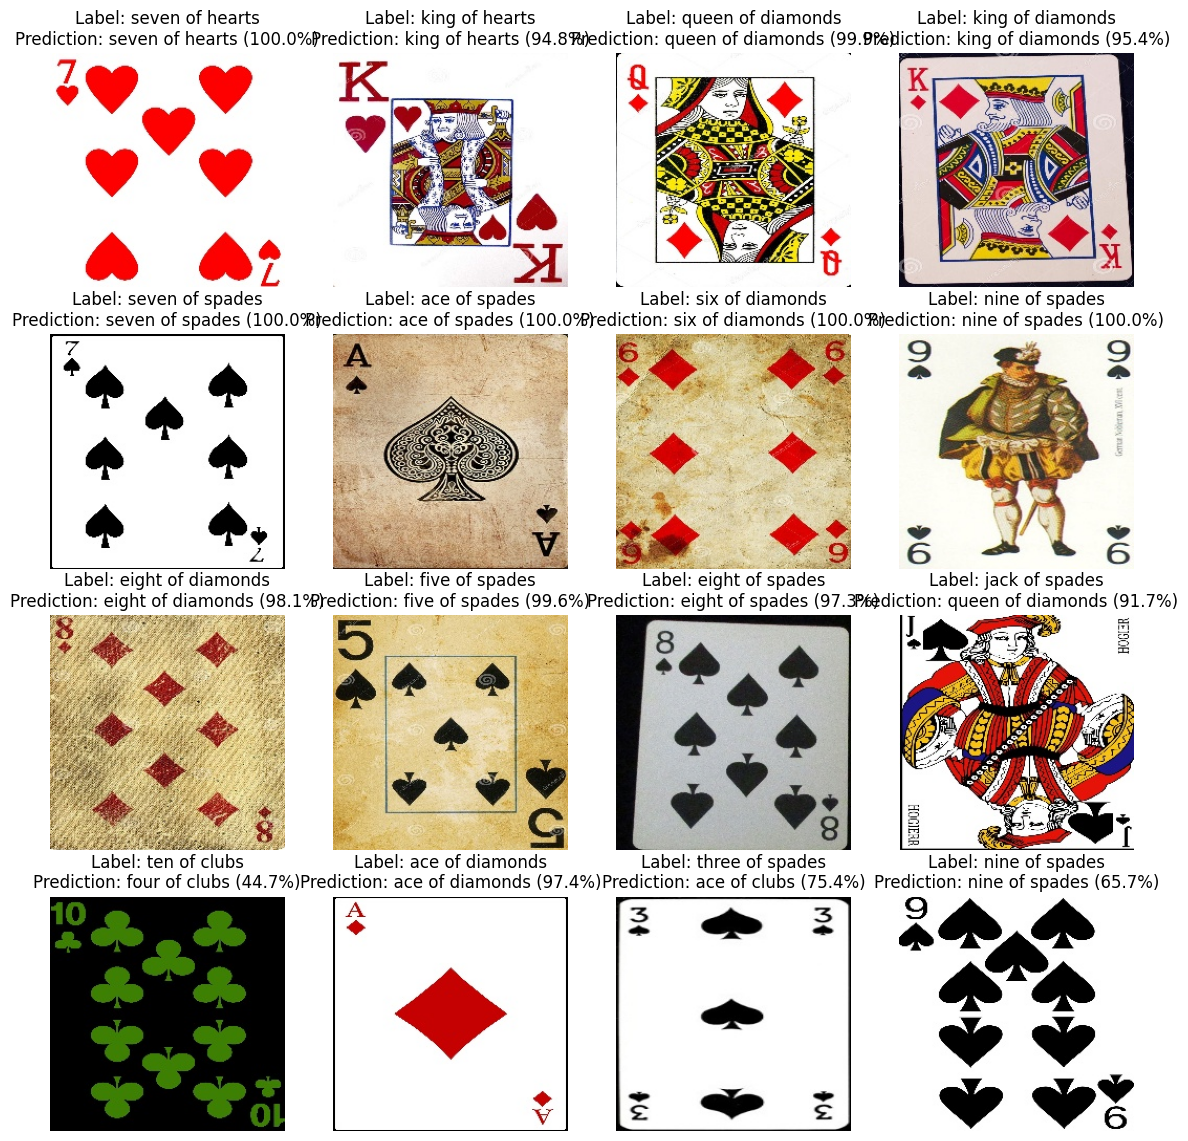

In [38]:
test_generator.reset()

images, labels = next(test_generator)

predictions = CNN_model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=[14, 14])
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title("Label: {}\nPrediction: {} ({:.1f}%)".format(
        card_classes[np.argmax(labels[i])], 
        card_classes[predicted_classes[i]], 
        100 * np.max(predictions[i])
    ))
    
plt.show()